In [74]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
blood_transfusion = pd.read_csv("transfusion.csv")
blood_transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


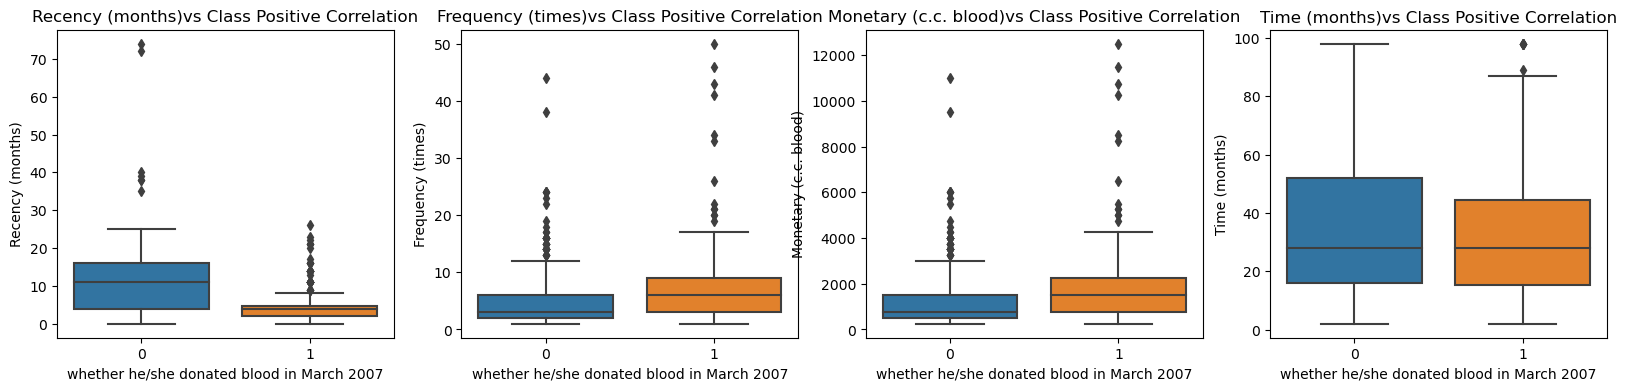

In [87]:
pos= ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']

f, axes = plt.subplots(ncols=len(pos), figsize=(20,4))
for i,j in enumerate(pos):
    sns.boxplot(x="whether he/she donated blood in March 2007", y=j, data=data, ax=axes[i])
    axes[i].set_title(j+'vs Class Positive Correlation')

<AxesSubplot:>

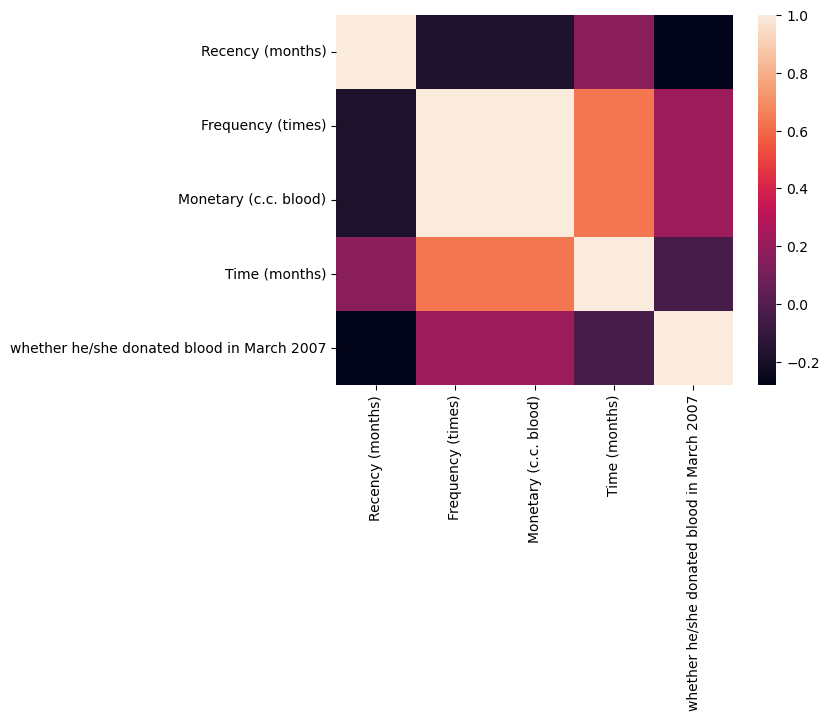

In [88]:
sns.heatmap(data.corr())

In [100]:
X = data.iloc[ :, :-1]
y = data.iloc[ :, -1]

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

classifier={'Logistic Regression': LogisticRegression(),
            'SVC': SVC(),
            'KNN': KNeighborsClassifier(n_neighbors=30)}

for key, value in classifier.items():
    cv_results = cross_validate(value, X, y, cv=10,scoring='accuracy', return_train_score=True, n_jobs=2)
    train_score = cv_results['train_score'].mean()
    test_score = cv_results['test_score'].mean()
    print(f'train score for {key}: {train_score:.3f}')
    print(f'train score for {key}: {test_score:.3f}\n')
    

train score for Logistic Regression: 0.777
train score for Logistic Regression: 0.769

train score for SVC: 0.768
train score for SVC: 0.761

train score for KNN: 0.766
train score for KNN: 0.761



/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se